<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/9/9e/Logo_ENSG_G%C3%A9omatique_2012.svg/220px-Logo_ENSG_G%C3%A9omatique_2012.svg.png" style="margin-left:auto; margin-right:auto"/>


<center> 
    <h1>ENSG : statistiques appliquées en cartographie</h1> 
    <h2>Réaliser une analyse univariée à l'aide de Python</h2> 
    <h3>Florian Bayer, Décembre 2022</h3> 
</center> 

<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

*   L'objectif de ce TD est de réaliser une petite analyse univariée à l'aide de Python

*   Cette analyse a pour but de vous faire découvrir un outil simple et gratuit pour l'analyse de données. Elle vise aussi à mieux comprendre vos données : nature, forme des distributions, signification.
  
*   Enfin, cette analyse vous permettra de justifier vos choix de discrétisation de manière objective

Pour cela, vous allez utiliser un notebook virtuel Jupyter Lab. Il permet d'exécuter du code Python dans des cellules afin d'afficher et de partager des résultats d'analyse. Des blocs de texte Markdown permettent de commenter l'ensemble du notebook 

Notez qu'en Python, on ne commente jamais ligne par ligne, mais pour des raisons pédagogiques, cela sera fait ici

Les exercices prendrons cette forme et <b>sont signaler en <span style="color:#bc4749">rouge</span>.</b>  : 

> **Exercice**


<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

# 1. Importation des packages et des données

## 1.1 Packages

- Les packages sont des outils permettant de réaliser certaines tâches facilement, sans avoir à tout coder vous même. Par exemple, lire un fichier Excel, charger un fond de carte etc.
- Vous découvrirez par vous même des packages en fonction de vos besoins, mais pour ce TD, ils sont déjà sélectionnés


#### Lancer l'importation des packages dans une cellule de code
- Ci-dessous se trouve une cellule de code. A l'inverse de la cellule actuelle (en Markdown), elle peut exécuter du code Python dans le Notebook
- Pour lancez une cellule de code, sélectionnez la et appuyez sur Shift+Entrée


In [1]:
import pandas as pd # Pour gérer les tableaux de données (on parle de Dataframe)
import matplotlib.pyplot as plt # pour afficher certains graphiques

<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

## 1.2 Importation des données

- Vous allez importer le premier jeu de données du TD, sur l'Europe. 
- Les données sont au format CSV dans le répertoire ./data/ (visible dans la fenêtre de gauche)
- Le CSV est formaté avec un séparateur ";" et des décimales ","

In [2]:
df_ue = pd.read_csv("./data/TD_Europe.csv", decimal=",", sep=";") # charge avec Pandas le csv TD_Europe.csv dans la variable df_ue
df_ue # affichage du dataframe. Si le nombre de lignes est trop importantes, seule une partie est affichée

,Code,Pays,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
0,DE,Allemagne,1.47,1.50,1.60,1.57,1.57,1.54
1,AT,Autriche,1.46,1.49,1.53,1.52,1.47,1.46
2,BE,Belgique,1.74,1.70,1.68,1.65,1.62,1.60
3,BG,Bulgarie,1.53,1.53,1.54,1.56,1.56,1.58
4,CY,Chypre,1.31,1.32,1.37,1.32,1.32,1.33
5,HR,Croatie,1.46,1.40,1.42,1.42,1.47,1.47
6,DK,Danemark,1.69,1.71,1.79,1.75,1.73,1.70
7,ES,Espagne,1.32,1.33,1.34,1.31,1.26,1.23
8,EE,Estonie,1.54,1.58,1.60,1.59,1.67,1.66
9,FI,Finlande,1.71,1.65,1.57,1.49,1.41,1.35


<div style="color:#bc4749">
    
> Exercice : vous allez faire en sorte d'afficher uniquement les 5 premières lignes du dataframe.<br>
  Pour cela, sélectionnez cette cellule et ajoutez une nouvelle cellule juste en dessous en appuyant sur "B" (Bellow). Tapez dans la nouvelle cellule : 


```python
df_ue.head(5)
```

> Insérer la nouvelle cellule après cette ligne en sélectionnant la cellule avec la souris puis en appuyant sur B. Affichez les 6 premières lignes de df_ue

</div>

--- 


Autres commandes :
- Pour supprimer une cellule, sélectionnez-la et appuyez sur "X".
- Pour insérer une cellule au dessus de la sélection : "A" (Above).
- Pour annuler l'action précédente : "Z"


<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

# 2. Manipuler le Dataframe

Vous pouvez manipuler votre dataframe facilement, comme un fichier Excel. Sauf que vous gardez une trace de vos actions.

## 2.1 Ajouter une nouvelle colonne
Par exemple, la commande ci-dessous calcule la moyenne de l'ICF 2018 et 2019 dans une nouvelle colonne

Entre crochets, on précise le nom de la nouvelle colonne :
```python
df_ue['moy_1819']
```

On précise la nouvelle valeur à calculer
```python
(df_ue['ICF_2018'] + df_ue['ICF_2019']) /2
```

In [3]:
df_ue['moy_1819'] = (df_ue['ICF_2018'] + df_ue['ICF_2019']) /2
df_ue.head(5)

,Code,Pays,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019,moy_1819
0,DE,Allemagne,1.47,1.50,1.60,1.57,1.57,1.54,1.555
1,AT,Autriche,1.46,1.49,1.53,1.52,1.47,1.46,1.465
2,BE,Belgique,1.74,1.70,1.68,1.65,1.62,1.60,1.610
3,BG,Bulgarie,1.53,1.53,1.54,1.56,1.56,1.58,1.570
4,CY,Chypre,1.31,1.32,1.37,1.32,1.32,1.33,1.325


<div style="color:#bc4749">

> **Exercice** <br>
> Dans la cellule ci-dessous, calculez le taux d'évolution de l'ICF entre 2014 et 2019. <br>
> Nommez la nouvelle colonne de manière efficace
    
</div>

<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

## 2.2 Supprimer une colonne
Pour supprimer une colonne : 


In [4]:
df_ue.drop(columns=['moy_1819'],inplace=True) # inplace=True permet d'appliquer directement la suppression. 
                                              # Cela revient (presque) à : df_ue = df_ue.drop(columns=['moy_1819'])
df_ue.head(5)

,Code,Pays,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
0,DE,Allemagne,1.47,1.50,1.60,1.57,1.57,1.54
1,AT,Autriche,1.46,1.49,1.53,1.52,1.47,1.46
2,BE,Belgique,1.74,1.70,1.68,1.65,1.62,1.60
3,BG,Bulgarie,1.53,1.53,1.54,1.56,1.56,1.58
4,CY,Chypre,1.31,1.32,1.37,1.32,1.32,1.33


<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

## 2.3 Filtrer un Dataframe
- Il existe de très nombreuses fonctionnalités avec Pandas qui sont communes en base de données : regroupements, pivots etc.
- Vous pouvez également filtrer le contenu. Par exemple, en affichant uniquement les pays dont l'ICF en 2019 > 1.7

In [5]:
df_ue.query("ICF_2019>1.7")

,Code,Pays,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
10,FR,France,2.00,1.96,1.93,1.89,1.87,1.86
13,IE,Irlande,1.89,1.85,1.81,1.77,1.75,1.71
22,CZ,Tchéquie,1.53,1.57,1.63,1.69,1.71,1.71
23,RO,Roumanie,1.56,1.62,1.69,1.78,1.76,1.77
26,SE,Suède,1.88,1.85,1.85,1.78,1.76,1.71


<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

## 3. Graphiques univariées
L'analyse d'un jeu de données passe par deux étapes (cf. cours) : 
1. sa représentation graphique, facile à interpréter mais subjectives
2. le calcul de statistiques objectives, factuelles et reproductibles

Pandas permet de construire rapidement des graphiques. Il s'appuie sur Matplotlib, une référence Python en matière de graphique... Mais qui demande une certaine maîtrise.

Dans l'exemple ci-dessous, l'histogramme de base de l'ICF 2014 en Europe reste assez simpliste


<AxesSubplot: ylabel='Frequency'>

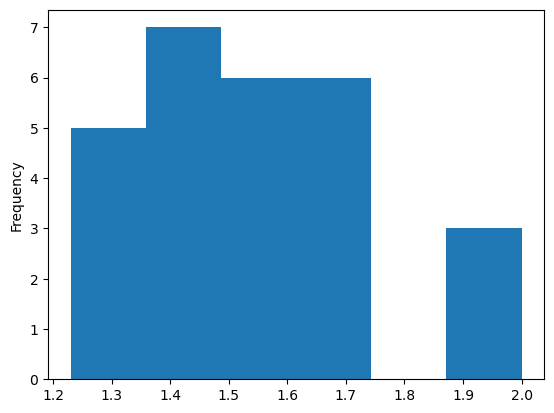

In [6]:
df_ue['ICF_2014'].plot.hist(bins=6)

<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

### 3.1 Histogrammes avec Seaborn

Nous allons utiliser une autre librairie, dédiée à la représentation graphique et qui utilise aussi Matplotlib: Seaborn

Notez que le résultat est assigné à une variable hist

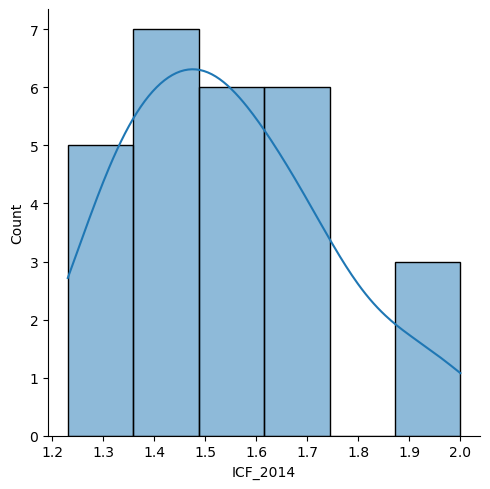

In [7]:
import seaborn as sns
hist = sns.displot(data=df_ue, # Le Dataframe
                 x="ICF_2014", # La colonne à utiliser
                 bins=6, # Le nombre de classes 
                 kde=True) # Ajoute la ligne de kernel density pour mieux visualiser la forme de la distribution

Il est possible d'ajouter des éléments au graphique en rappelant la variable hist après avoir créé le graphique

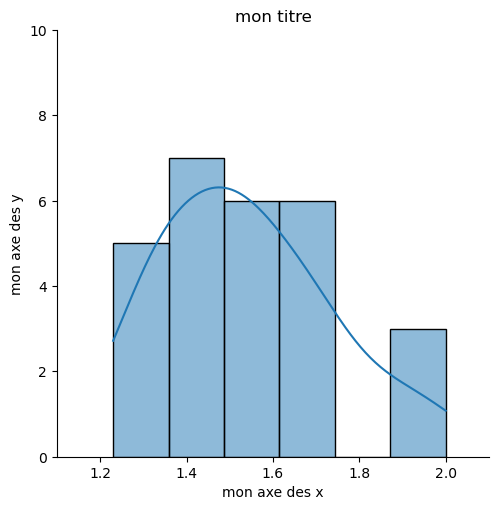

In [8]:
hist = sns.displot(data=df_ue, # Le Dataframe
                 x="ICF_2014", # La colonne à utiliser
                 bins=6, # Le nombre de classes 
                 kde=True)

hist.set(title='mon titre',
         xlabel='mon axe des x',
         ylabel='mon axe des y',
         xlim = (1.1,2.1), # les limites de l'axe X
         ylim=(0, 10)) # et de y

<div style="color:#bc4749">

> **Exercice** <br> Essayez maintenant de construire dans le bloc de code ci-dessous un histogramme pour l'année 2018 <br> Mettez le en page avec un titre et des libellés x et y adéquats
<br> Faites en sorte qu'il soit comparable au graphique 2014 précédent
    
</div>

<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

### 3.2 Boxplots avec Seaborn
Il est possible de réaliser d'autres graphiques dans Seaborn. Dans l'exemple du boxplot, l'ensemble du Dataframe df_ue est passé dans la fonction boxplot. Les 6 répartitions sont alors visibles

[Text(0.5, 1.0, "Evolution de l'inndicateurs conjoncturel de fécondité\nen Europe")]

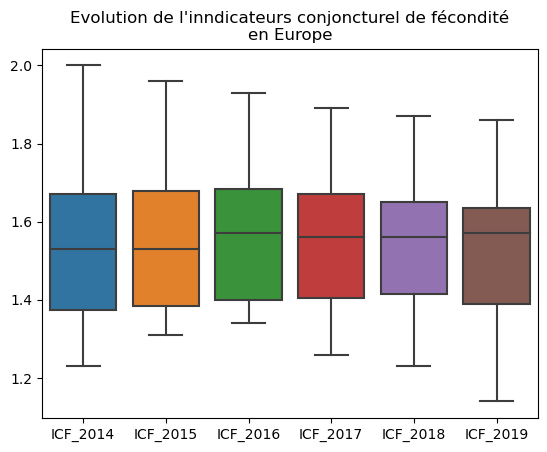

In [9]:
bp = sns.boxplot(data=df_ue)
bp.set(title="Evolution de l'inndicateurs conjoncturel de fécondité\nen Europe") #remarquez le \n dans le titre qui permet de faire un saut de ligne

<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

## 4. Statistiques univariées
L'interprétation visuelle des graphiques n'est cependant pas suffisante. 
- En analyse de données, il convient de coupler les graphiques à des calculs statistiques
- Qui ont l'avantage d'être factuels, objectifs et reproductibles

Pandas propose des outils pour y parvenir


### 4.1 Description des données
La fonction describe d'un Dataframe Pandas donne :
- le nombre d'individus
- la moyenne (mean)
- l'écart-type (std)
- les quartiles

In [10]:
df_ue.describe()

,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.539630,1.544074,1.565926,1.551481,1.539630,1.524444
std,0.196948,0.182867,0.170480,0.169449,0.170056,0.177576
min,1.230000,1.310000,1.340000,1.260000,1.230000,1.140000
25%,1.375000,1.385000,1.400000,1.405000,1.415000,1.390000
50%,1.530000,1.530000,1.570000,1.560000,1.560000,1.570000
75%,1.670000,1.680000,1.685000,1.670000,1.650000,1.635000
max,2.000000,1.960000,1.930000,1.890000,1.870000,1.860000


<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

### 4.2 Coefficient d'asymétrie
Vous pouvez aussi vérifier si la série est globalement symétrique

- Le coefficient d'asymétrie (skew) peut être calculé pour toute les colonnes numériques
- On constate que pour 2017 et 2018, les données semblent plutôt symétriques. 
- Mais le graphique 2018 réalisé précédemment permet de relativiser ce résultat. Avec seulement 27 individus (pays), il faut rester prudent lors de l'interprétation de ces statistiques et croiser les résultats avec vos interprétations graphiques

In [11]:
df_ue.skew(numeric_only=True) # le paramètre numeric_only=True précise que le Skew ne sera pas calculé sur les colonnes non numériques

ICF_2014    0.601037
ICF_2015    0.498751
ICF_2016    0.355266
ICF_2017    0.037223
ICF_2018   -0.092586
ICF_2019   -0.323104
dtype: float64

<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

### 4.3 Normalité des séries
Il serait possible de calculer le coefficient d'aplatissement de chaque série : 

```python
df_ue.kurtosis(numeric_only=True)
```

Mais nous allons plutôt utiliser un test statistique pour vérifier si les données suivent une loi normale.

Pour cela, vous allez utiliser un autre package très utile en statistique : scipy
- il contient de nombreux outils statistiques et fonctionne bien avec Pandas (et plus généralement Numpy)
- [l'aide en ligne](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) permet de trouver les outils qui vous intéressent 
- et les différentes options qui accompagnent les fonctions



Le module stats de scipy va être importé pour nous aider à déterminer si une série suit une loi normale ou non
- De nouveau, il faut rester prudent vis-à-vis du résultat : avec 27 individus, il sera toujours difficile de déterminer si la série suit vraiment une loi normale

In [12]:
from scipy import stats # scipy n'est pas importé complètement, seule un module qui nous intéresse est chargé : stats

On utilise le test de Shapiro-Wilk sur les données 2018. <br>
- La valeur statistic est difficilement interprétable seule
- La pvalue est plus intéressante. A moins de 5% (pvalue<0.05), on peut rejeter l'hypothèse nulle et accepter H1, la distribution n'est pas normale.
- Ici la pvalue=0.76, ce qui pourrait laisser croire que la série suit une loi normale
- Hors les graphiques précédents laissent la place au doute. Peut-être que le test manque de puissance (27 pays).

In [13]:
stats.shapiro(df_ue['ICF_2018'])

ShapiroResult(statistic=0.9759427309036255, pvalue=0.7616175413131714)

<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

### 4.4 Diagramme Q-Q Plot
Dans le doute, on utilise une dernière méthode très pratique pour vérifier la normalité d'une série : le diagramme [q-q plot](https://fr.wikipedia.org/wiki/Diagramme_quantile-quantile)
- Il permet d'illustrer sur un graphique la position des quantiles observées par rapport à ce qu'ils devraient être en théorie s'ils suivaient une loi normale 
- Si l'observé et le théorique sont semblables, alors les observations s'alignent sur une droite : les données suivent une loi normale

Une autre librairie va être chargée : statsmodels

In [14]:
import statsmodels.api as sm

Les données 2018 ne se positionnent pas parfaitement sur la droite rouge. De nouveau, le manque de puissance rend la conclusion difficile

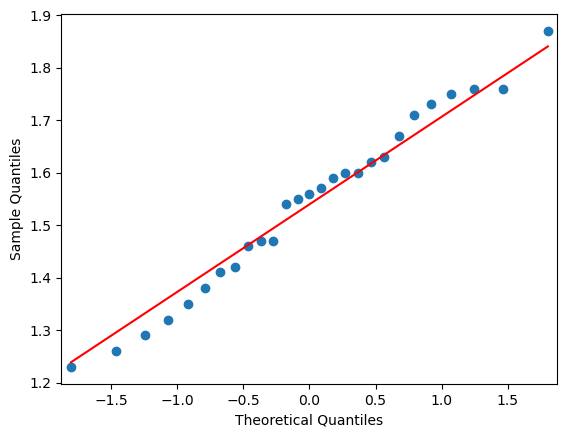

In [15]:
sm.qqplot(df_ue['ICF_2018'], line='s')
plt.show()

Voici le résultat dans le cas où on génère une série de données qui suit une loi normale :

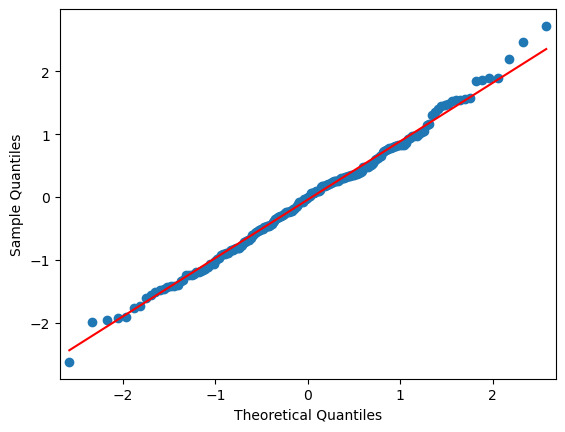

In [16]:
import numpy as np 

np.random.seed(42) # Permet de conserver le même "aléa"
mu, sigma = 0, 1 # moyenne à 0, écart-type à 1

s = np.random.normal(mu, sigma, 200) # génération des données 

sm.qqplot(s, line='s')
plt.show()

Et pour une série qui suit une loi exponentielle :

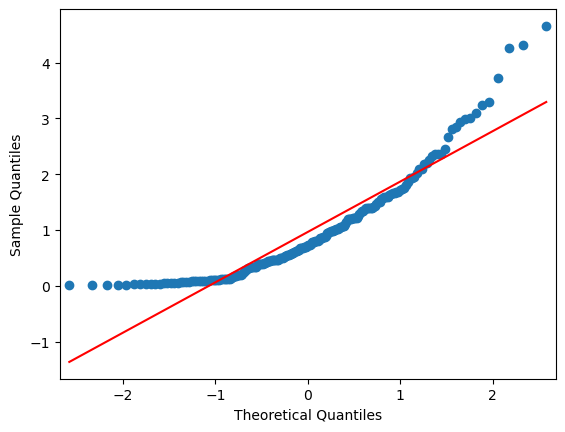

In [17]:
s = np.random.exponential(size = 200)

sm.qqplot(s, line='s')
plt.show()

<hr style="height: 1px; color:  #a7aeae ; background-color:  #a7aeae; width: 25%; border: none;">

## 5 Centrer-réduire

<div style="color:#bc4749">
<blockquote>
<b>Exercice</b> <br>
Pour le dernier exercice de la première partie du TD, il est demandé : 
1. de centrer-réduire toutes les données de l'ICF de 2014 à 2019
2. de comparer graphiquement les résultats obtenus

Pour cet exercice, vous êtes libre. Vous pouvez centrer-réduire avec un calcul pandas ou bien essayez d'utiliser 
[scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)
</blockquote>    
<div style="color:#bc4749">